***Explorar datos con funciones como .head(), .info(), y .describe().***

In [12]:
import pandas as pd
df = pd.read_csv("CSVLaboratorio2AD_B.csv")
df.head(10)

,Producto,Mes,Sucursal,Precio_unitario,Cantidad_vendida
0,A,Enero,Norte,15.24,45
1,A,Enero,Sur,92.37,11
2,A,Enero,Este,49.81,29
3,A,Enero,Oeste,31.58,36
4,A,Febrero,Norte,18.45,25
5,A,Febrero,Sur,26.46,21
6,A,Febrero,Este,94.12,36
7,A,Febrero,Oeste,67.44,10
8,A,Marzo,Norte,56.50,37
9,A,Marzo,Sur,69.14,9


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Producto          64 non-null     object 
 1   Mes               64 non-null     object 
 2   Sucursal          64 non-null     object 
 3   Precio_unitario   64 non-null     float64
 4   Cantidad_vendida  64 non-null     int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 2.6+ KB


In [14]:
df.describe()

,Precio_unitario,Cantidad_vendida
count,64.000000,64.000000
mean,54.157813,27.781250
std,26.611892,12.794429
min,11.380000,5.000000
25%,31.012500,17.750000
50%,55.795000,25.000000
75%,72.595000,36.250000
max,98.160000,49.000000


***Crear una nueva columna llamada “Ingresos Totales”.***

In [15]:
df['Ingresos_totales'] = df['Precio_unitario'] * df['Cantidad_vendida']
df.head()

,Producto,Mes,Sucursal,Precio_unitario,Cantidad_vendida,Ingresos_totales
0,A,Enero,Norte,15.24,45,685.80
1,A,Enero,Sur,92.37,11,1016.07
2,A,Enero,Este,49.81,29,1444.49
3,A,Enero,Oeste,31.58,36,1136.88
4,A,Febrero,Norte,18.45,25,461.25


***Filtrar datos según una condición (Filtrar aquellos productos de los que se hay vendido más de 40 unidades).***

In [16]:
filtro = df[df['Cantidad_vendida'] > 40]
filtro

,Producto,Mes,Sucursal,Precio_unitario,Cantidad_vendida,Ingresos_totales
0,A,Enero,Norte,15.24,45,685.80
12,A,Abril,Norte,14.29,49,700.21
14,A,Abril,Este,24.28,48,1165.44
17,B,Enero,Sur,18.26,49,894.74
25,B,Marzo,Sur,41.17,49,2017.33
30,B,Abril,Este,89.80,41,3681.80
33,C,Enero,Sur,94.01,49,4606.49
35,C,Enero,Oeste,58.54,48,2809.92
40,C,Marzo,Norte,88.05,49,4314.45
43,C,Marzo,Oeste,70.95,41,2908.95


***Filtrar los 10 precios más altos.***

In [17]:
precios_altos = df.nlargest(10, 'Precio_unitario')
precios_altos

,Producto,Mes,Sucursal,Precio_unitario,Cantidad_vendida,Ingresos_totales
20,B,Febrero,Norte,98.16,24,2355.84
29,B,Abril,Sur,95.42,35,3339.70
39,C,Febrero,Oeste,94.98,19,1804.62
38,C,Febrero,Este,94.95,13,1234.35
6,A,Febrero,Este,94.12,36,3388.32
33,C,Enero,Sur,94.01,49,4606.49
1,A,Enero,Sur,92.37,11,1016.07
30,B,Abril,Este,89.80,41,3681.80
40,C,Marzo,Norte,88.05,49,4314.45
47,C,Abril,Oeste,83.86,7,587.02


***Gráfico de barras con Matplotlib***

<function matplotlib.pyplot.show(close=None, block=None)>

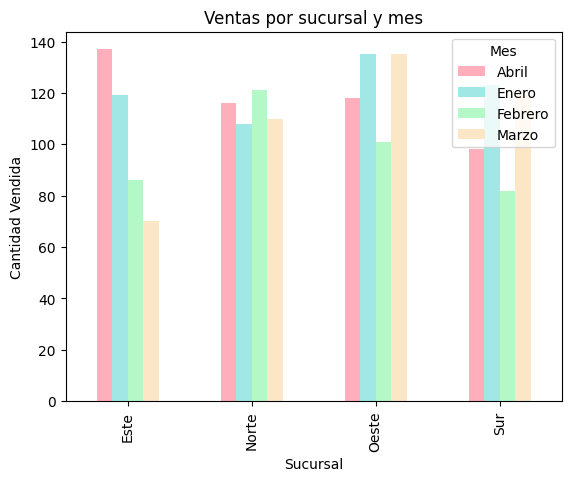

In [18]:
# Crear un gráfico de barras que agrupe las ventas por sucursal y mes,
# y sume las cantidades vendidas.
import matplotlib.pyplot as plt

ventas_sucursal = df.groupby(['Sucursal', 'Mes'])['Cantidad_vendida'].sum().unstack()
ventas_sucursal.plot(kind='bar', color=['#FFAEBC', '#A0E7E5', '#B4F8C8','#FBE7C6'])

plt.title('Ventas por sucursal y mes')
plt.ylabel('Cantidad Vendida')
plt.xlabel('Sucursal')
plt.show

***Gráfico de dispersión con Matplotlib***

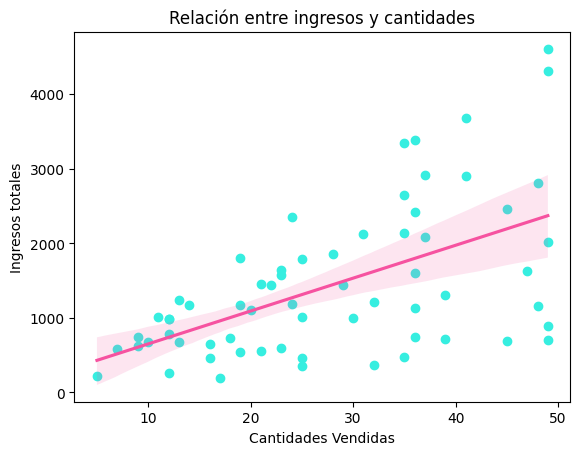

In [19]:
# Crear un gráfico de dispersión para mostrar la relación entre las columnas
# “Ingresos totales” y “Cantidad Vendida”.

import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(df['Cantidad_vendida'], df['Ingresos_totales'], color='#36eee0')
sns.regplot(x='Cantidad_vendida', y='Ingresos_totales', data=df, scatter=False, color='#f652a0')


plt.xlabel('Cantidades Vendidas')
plt.ylabel('Ingresos totales')
plt.title('Relación entre ingresos y cantidades')

plt.show()